### Data Preprocessing 

##### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

##### Importing Dataset

In [18]:
# Importing the dataset
dataset = pd.read_csv('Data.csv')

# Defining Dependent and Independent variables 
independent_variables = dataset.iloc[:, :-1].values
dependent_variables = dataset.iloc[:, -1:].values

##### Taking care of missing data

In [175]:
# Replacing the missing values with the average of all the salaries
# You can choose any method mean, median or anything according to your usecase 
from sklearn.impute import SimpleImputer

# This means replace all the missin/nan values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# This will replace the values 
imputer.fit(independent_variables[:, 1:3])
# The transform function returns a table with array filled with missing values 
independent_variables[:, 1:3] = imputer.transform(independent_variables[:, 1:3])

independent_variables


array([[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778,
        52000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]],
      dtype=object)

### Encoding Categorical Data

In [76]:
# Here we need a way to encode the strings such that it is not in a numberical format but not also in a string format

# If it was in a numerical format, further machine learning model would think that there is some numerical relation between the countries and other values. 
# Using string, machine would not be able to understand exactly what it is 

# 1. encoding the independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0])], remainder='passthrough')
independent_variables = np.array(ct.fit_transform(independent_variables))

# 2. Encoding Dependent variable 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dependent_variables = le.fit_transform(dependent_variables)

c:\Users\athar\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Splitting the dataset into the Training set and Test set

Here we split the dataset into two different sets, one that we use to train the data and the other that we use to test the dataset 

#### Feature Scaling 

Feature scaling gets us the mean and median of a dataset
We do feature scaling after spliting the dataset, because if we do it before splitting then we get the mean of the entire dataset including the test dataset


In [178]:
from sklearn.model_selection import train_test_split

# We take 80 pecent for training and 20 percent for testing
X_Train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variables,test_size=0.2, random_state=1)

In [180]:
X_Train

array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778,
        52000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0]],
      dtype=object)

In [182]:
X_test

array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]],
      dtype=object)

In [183]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [184]:
y_test

array([0, 1], dtype=int64)

##### Feature scaling 

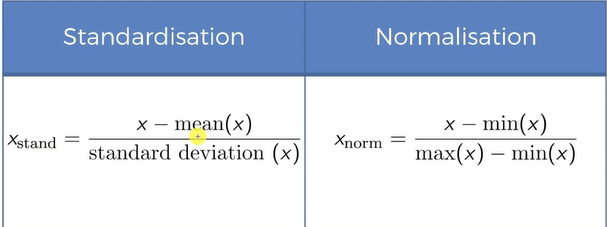

Normalisation is recommended when you have a normalization relation between all your values 
Standardization works well all the time!

So it's a good thing to go with Standardization

In [197]:
# Importing sklearn library for standarization
from sklearn.preprocessing import StandardScaler

# Initializing the standard scalar class
sc = StandardScaler()

# We apply standardization only on our numerical values and not on dummy values like country 
X_Train[:, 3:] = sc.fit_transform(X_Train[:, 3:])
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])


In [198]:
print(X_Train)
print(X_test)

[[ 6.1         3.          4.6         0.23380268]
 [ 7.7         3.          6.1         1.39742892]
 [ 5.6         2.5         3.9        -0.15407273]
 [ 6.4         2.8         5.6         1.13884531]
 [ 5.8         2.8         5.1         1.52672073]
 [ 5.3         3.7         1.5        -1.31769898]
 [ 5.5         2.3         4.          0.10451088]
 [ 5.2         3.4         1.4        -1.31769898]
 [ 6.5         2.8         4.6         0.36309449]
 [ 6.7         2.5         5.8         0.7509699 ]
 [ 6.8         3.          5.5         1.13884531]
 [ 5.1         3.5         1.4        -1.18840717]
 [ 6.          2.2         5.          0.36309449]
 [ 6.3         2.9         5.6         0.7509699 ]
 [ 6.6         2.9         4.6         0.10451088]
 [ 7.7         2.6         6.9         1.39742892]
 [ 5.7         3.8         1.7        -1.18840717]
 [ 5.          3.6         1.4        -1.31769898]
 [ 4.8         3.          1.4        -1.18840717]
 [ 5.2         2.7         3.9 

##### Example 1

In [36]:
# Importing the necessary libraries
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

# Loading the Iris dataset
dataset = pd.read_csv('iris.csv')

# Creating the matrix of features (X) and the dependent variable vector (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Printing the matrix of features and the dependent variable vector
print(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Example 2

In [63]:
# Importing the necessary libraries
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np 

# Load the dataset
dataset = pd.read_csv('pima-indians-diabetes.csv')

# Identify missing data (assumes that missing data is represented as NaN)
missing_values = dataset.isnull().sum().sum()

# Print the number of missing entries in each column
print("There are", missing_values, "missing values in the dataframe")

# Configure an instance of the SimpleImputer class
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the DataFrame
simple_imputer.fit(dataset)

# Apply the transform to the DataFrame
dataset = simple_imputer.transform(dataset)

#Print your updated matrix of features
print(dataset)

There are 0 missing values in the dataframe
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


### Example 3   

In [172]:
# Importing the necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dataset = pd.read_csv('titanic.csv')
survived_column = dataset['Survived']
dataset = dataset.drop('Survived', axis='columns')

dataset['Survived'] = survived_column

# Identify the categorical data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1:].values

# Implement an instance of the ColumnTransformer class
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [2, 3, 7, 9, 10])], remainder='passthrough')

# Apply the fit_transform method on the instance of ColumnTransformer
X = np.array(ct.fit_transform(X))


# Convert the output into a NumPy array


# Use LabelEncoder to encode binary categorical data
le = LabelEncoder()
y = le.fit_transform(y)

# Print the updated matrix of features and the dependent variable vector
print(X, y)


  (0, 49)	1.0
  (0, 183)	1.0
  (0, 294)	1.0
  (0, 384)	1.0
  (0, 445)	1.0
  (0, 448)	2.0
  (0, 449)	1.0
  (0, 450)	38.0
  (0, 451)	1.0
  (0, 453)	71.2833
  (1, 70)	1.0
  (1, 183)	1.0
  (1, 216)	1.0
  (1, 360)	1.0
  (1, 447)	1.0
  (1, 448)	4.0
  (1, 449)	1.0
  (1, 450)	35.0
  (1, 451)	1.0
  (1, 453)	53.1
  (2, 112)	1.0
  (2, 184)	1.0
  (2, 240)	1.0
  (2, 429)	1.0
  (2, 447)	1.0
  :	:
  (180, 373)	1.0
  (180, 445)	1.0
  (180, 448)	880.0
  (180, 449)	1.0
  (180, 450)	56.0
  (180, 452)	1.0
  (180, 453)	83.1583
  (181, 75)	1.0
  (181, 183)	1.0
  (181, 195)	1.0
  (181, 337)	1.0
  (181, 447)	1.0
  (181, 448)	888.0
  (181, 449)	1.0
  (181, 450)	19.0
  (181, 453)	30.0
  (182, 20)	1.0
  (182, 184)	1.0
  (182, 193)	1.0
  (182, 364)	1.0
  (182, 445)	1.0
  (182, 448)	890.0
  (182, 449)	1.0
  (182, 450)	26.0
  (182, 453)	30.0 [1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0

c:\Users\athar\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Example 4

In [192]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
dataset = pd.read_csv('iris.csv')

# Separate features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into an 80-20 training-test set
X_Train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply feature scaling on the training and test sets
# Print the scaled training and test sets